In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from p_kine import kine
from net import Net_7 as Net
# 定义训练参数
param = {"Net":"Net7_2",
         "generate_num":16000,
         "tran_num":16000,
         "test_num":1000
         }

In [2]:
# 定义模型、训练损失函数和优化器
model = Net()
criterion = nn.MSELoss()


In [3]:
# 生成随机数据
def generate_data(num_samples):
    inputs = []
    labels = []
    # 布尔索引，True表示要保留的元素
    mask = np.array([True, False, False, True, True, True])
    for _ in range(num_samples):
        phi = np.array([
            np.random.uniform(-np.pi, np.pi),0,0])
        theta = np.array([
            np.random.uniform(0, np.pi/2),
            np.random.normal(loc=0, scale=np.pi/4),
            np.random.normal(loc=0, scale=np.pi/2)
        ])
        pose = np.vstack([phi, theta]).reshape(-1)  # 重组为一维数组
        loc = kine(pose)
        labels.append(pose[mask])
        inputs.append(loc)
    inputs = np.array(inputs)  # 先转换为 NumPy 数组
    labels = np.array(labels)  # 先转换为 NumPy 数组
    return torch.tensor(inputs, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)
# 准备数据
inputs, labels = generate_data(param["generate_num"])
# # 分割一下，也许是因为学习率
# inputs_1 = inputs[0:10000]
# labels_1 = labels[0:10000]
# inputs_2 = inputs[10000:20000]
# labels_2 = labels[10000:20000]
# inputs_3 = inputs[20000:-1]
# labels_3 = labels[20000:-1]


In [4]:
print(inputs[0:3])
print(labels[0:3])

tensor([[ 1.1315,  0.6503,  2.5285],
        [-0.4792,  0.0571,  1.8038],
        [-0.9913,  2.1201,  0.5691]])
tensor([[ 0.5216,  0.2348,  0.6565, -0.2561],
        [-0.1187,  0.1871, -0.3984, -3.3582],
        [ 2.0082,  0.8012,  1.3804,  0.1961]])


Epoch [100/16000], Loss: 0.9412252306938171
Epoch [200/16000], Loss: 0.8733060359954834
Epoch [300/16000], Loss: 0.8569223880767822
Epoch [400/16000], Loss: 0.8485504388809204
Epoch [500/16000], Loss: 0.8449206352233887
Epoch [600/16000], Loss: 0.8402172923088074
Epoch [700/16000], Loss: 0.8355482220649719
Epoch [800/16000], Loss: 0.8332284688949585
Epoch [900/16000], Loss: 0.8311935067176819
Epoch [1000/16000], Loss: 0.8295406699180603
Epoch [1100/16000], Loss: 0.8284616470336914
Epoch [1200/16000], Loss: 0.8271961808204651
Epoch [1300/16000], Loss: 0.8261652588844299
Epoch [1400/16000], Loss: 0.8256462812423706
Epoch [1500/16000], Loss: 0.8268575668334961
Epoch [1600/16000], Loss: 0.8266139030456543
Epoch [1700/16000], Loss: 0.8235349059104919
Epoch [1800/16000], Loss: 0.823542594909668
Epoch [1900/16000], Loss: 0.8218220472335815
Epoch [2000/16000], Loss: 0.8212385177612305
Epoch [2100/16000], Loss: 0.8210729360580444
Epoch [2200/16000], Loss: 0.8214805722236633
Epoch [2300/16000], 

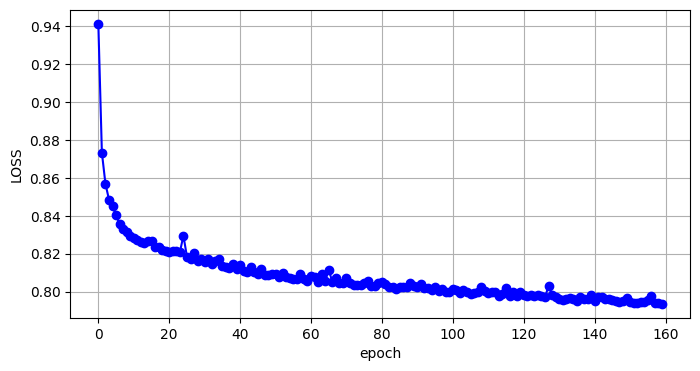

Epoch [100/16000], Loss: 0.7972261905670166
Epoch [200/16000], Loss: 0.7935571670532227
Epoch [300/16000], Loss: 0.7931694388389587
Epoch [400/16000], Loss: 0.7930960059165955
Epoch [500/16000], Loss: 0.7930417656898499
Epoch [600/16000], Loss: 0.7929895520210266
Epoch [700/16000], Loss: 0.7929368019104004
Epoch [800/16000], Loss: 0.7928825616836548
Epoch [900/16000], Loss: 0.7928266525268555
Epoch [1000/16000], Loss: 0.7934058308601379
Epoch [1100/16000], Loss: 0.79271399974823
Epoch [1200/16000], Loss: 0.7926810383796692
Epoch [1300/16000], Loss: 0.7928116321563721
Epoch [1400/16000], Loss: 0.7930174469947815
Epoch [1500/16000], Loss: 0.7933861613273621
Epoch [1600/16000], Loss: 0.7933072447776794
Epoch [1700/16000], Loss: 0.7938933372497559
Epoch [1800/16000], Loss: 0.7925066351890564
Epoch [1900/16000], Loss: 0.7925043702125549
Epoch [2000/16000], Loss: 0.7932220697402954
Epoch [2100/16000], Loss: 0.7931215763092041
Epoch [2200/16000], Loss: 0.7924599647521973
Epoch [2300/16000], L

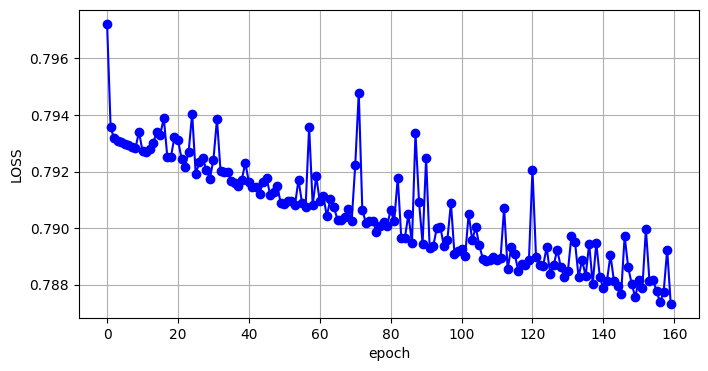

In [5]:
# 训练
def train_model(model, criterion, optimizer, inputs, labels, num_epochs):
    data = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')
            data.append(loss.item())
    # 创建一个折线图
    plt.figure(figsize=(8, 4))  # 图片大小
    plt.plot(data, marker='o', linestyle='-', color='b')  # 点样式、线样式、颜色
    plt.xlabel('epoch')  # x轴标签
    plt.ylabel('LOSS')  # y轴标签
    plt.grid(True)  # 显示网格
    plt.show()
optimizer = optim.Adam(model.parameters(), 0.01)
train_model(model, criterion, optimizer, inputs, labels, param["tran_num"])
optimizer = optim.Adam(model.parameters(), 0.005)
train_model(model, criterion, optimizer, inputs, labels, param["tran_num"])
# optimizer = optim.Adam(model.parameters(), 0.002)
# train_model(model, criterion, optimizer, inputs, labels, param["tran_num"])

# 保存模型
torch.save(model.state_dict(), f'model_libs/{param["Net"]}_model.pth')


In [14]:
# 测试模型
criterion = nn.MSELoss()#统一标准
test_inputs, test_labels = generate_data(param["test_num"])
with torch.no_grad():
    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_labels)
print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.8529821634292603


去掉两个无关phi效果好了很多，从1到0.8

param = {"Net":"Net7",
         "generate_num":10000,
         "tran_num":20000,
         "test_num":100,
         "lr":0.005}
Test Loss: 0.930511474609375

param = {"Net":"Net7",
         "generate_num":20000,
         "tran_num":20000,
         "test_num":100,
         "lr":0.01}
Test Loss: 0.819723904132843

param = {"Net":"Net7",
         "generate_num":30000,
         "tran_num":30000,
         "test_num":100,
         "lr":0.01}
Test Loss: 0.7506481409072876

增加            nn.BatchNorm1d(24),
            nn.ReLU(),
            之后效果下降了，Test Loss: 0.954072892665863

明天搞清楚loss到底是代表什么，并且再试一试DDPQ，就可以只考虑怎么报告以及未来发展了。

param = {"Net":"Net7",
         "generate_num":40000,
         "tran_num":40000,
         "test_num":100,
         "lr":0.005}Test Loss: 0.9562934637069702

param = {"Net":"Net7",
         "generate_num":30000,
         "tran_num":30000,
         "test_num":100,
         "lr":0.01}Test Loss: 0.6966496109962463